<a href="https://colab.research.google.com/github/FernandoBRdgz/diplomado_ds_mod4/blob/main/4.1%20Introducci%C3%B3n%20a%20Redes%20Neuronales%20Artificiales/4.1.3%20Puertas%20l%C3%B3gicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.12.0'

In [ ]:
!nvidia-smi

Sat Apr 15 15:02:00 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
tf.test.is_built_with_gpu_support()

True

In [ ]:
tf.test.is_built_with_cuda()

True

In [ ]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')

print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
    print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
    raise SystemError('GPU device not found')

def cpu():
    with tf.device('/cpu:0'):
        random_image_cpu = tf.random.normal((100, 100, 100, 3))
        net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
        return tf.math.reduce_sum(net_cpu)

def gpu():
    with tf.device('/device:GPU:0'):
        random_image_gpu = tf.random.normal((100, 100, 100, 3))
        net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
        return tf.math.reduce_sum(net_gpu)

cpu()
gpu()

# Ejecuta la operación varias veces.
print('Tiempo (s) para convertir el filtro 32x7x7x3 en imágenes aleatorias de 100x100x100x3 '
      '(batch x height x width x channel). Suma de diez corridas.')

print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)

print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)

print('Aceleración de GPU sobre CPU: {}x'.format(int(cpu_time/gpu_time)))

Tiempo (s) para convertir el filtro 32x7x7x3 en imágenes aleatorias de 100x100x100x3 (batch x height x width x channel). Suma de diez corridas.
CPU (s):
3.5663230249999742
GPU (s):
0.09106680600001482
Aceleración de GPU sobre CPU: 39x


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Opción 1 - Añadir capas a partir de una lista

model = Sequential([
    Dense(units=2),
    Dense(units=2),
    Dense(units=2)
])

In [ ]:
# Opción 2 - Añadir capas con el método .add()

model = Sequential()
model.add(Dense(2))
model.add(Dense(2))
model.add(Dense(2))

### AND

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [ ]:
y = np.array([[0],[0],[0],[1]])
y

array([[0],
       [0],
       [0],
       [1]])

In [ ]:
model = Sequential()
model.add(Dense(1, activation='linear'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
%%time
tf.random.set_seed(42)
history = model.fit(X, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 2s 2s/step - loss: 0.6974
Epoch 2/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.6971
Epoch 3/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6968
Epoch 4/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6965
Epoch 5/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6961
Epoch 6/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6958
Epoch 7/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6955
Epoch 8/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6952
Epoch 9/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6949
Epoch 10/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6946
Epoch 11/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6942
Epoch 12/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6939
Epoch 13/2000
1/1 [=====================

In [ ]:
loss = history.history["loss"]

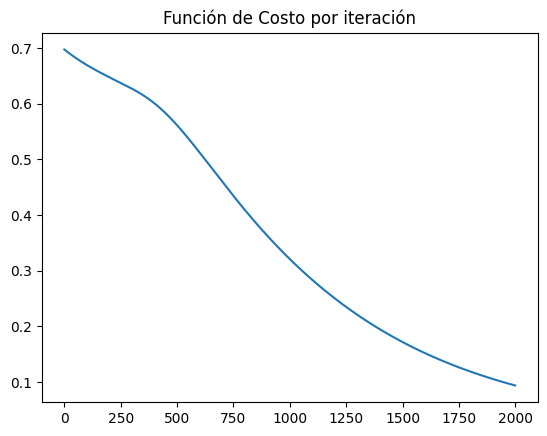

In [ ]:
sns.lineplot(x=range(len(loss)), y=loss)
plt.title("Función de Costo por iteración");

In [ ]:
model.predict(X)

1/1 [==============================] - 0s 112ms/step


array([[0.00211137],
       [0.08091441],
       [0.12966521],
       [0.86109275]], dtype=float32)

In [ ]:
1*(model.predict(X) > 0.5)

1/1 [==============================] - 0s 26ms/step


array([[0],
       [0],
       [0],
       [1]])

In [ ]:
y

array([[0],
       [0],
       [0],
       [1]])

### OR

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [ ]:
y = np.array([[0],[1],[1],[1]])
y

array([[0],
       [1],
       [1],
       [1]])

In [ ]:
model = Sequential()
model.add(Dense(1, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
%%time
tf.random.set_seed(42)
history = model.fit(X, y, epochs=2000)

Epoch 1/2000
1/1 [==============================] - 1s 950ms/step - loss: 0.5910
Epoch 2/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.5904
Epoch 3/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.5899
Epoch 4/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.5894
Epoch 5/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.5888
Epoch 6/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.5883
Epoch 7/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.5878
Epoch 8/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.5872
Epoch 9/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.5867
Epoch 10/2000
1/1 [==============================] - 0s 14ms/step - loss: 0.5862
Epoch 11/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.5857
Epoch 12/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.5851
Epoch 13/2000
1/1 [==================

In [ ]:
loss = history.history["loss"]

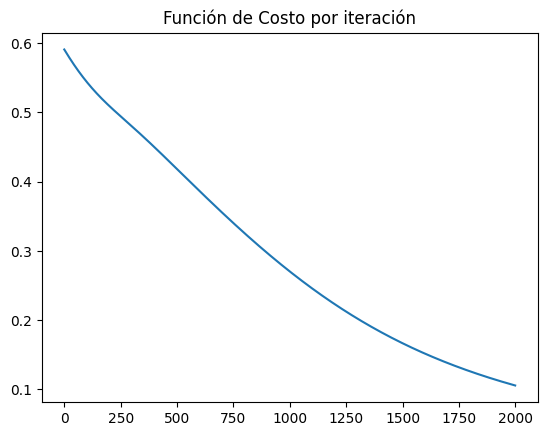

In [ ]:
sns.lineplot(x=range(len(loss)), y=loss)
plt.title("Función de Costo por iteración");

In [ ]:
model.predict(X)

1/1 [==============================] - 0s 92ms/step


array([[0.19770822],
       [0.88075745],
       [0.95901304],
       [0.9675791 ]], dtype=float32)

In [ ]:
1*(model.predict(X) > 0.5)

1/1 [==============================] - 0s 37ms/step


array([[0],
       [1],
       [1],
       [1]])

In [ ]:
y

array([[0],
       [1],
       [1],
       [1]])

### XOR

In [ ]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
X

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [ ]:
y = np.array([[0],[1],[1],[0]])
y

array([[0],
       [1],
       [1],
       [0]])

In [ ]:
model = Sequential()
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
%%time
tf.random.set_seed(42)
history = model.fit(X, y, epochs=3000)

Streaming output truncated to the last 5000 lines.
Epoch 502/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.6598
Epoch 503/3000
1/1 [==============================] - 0s 7ms/step - loss: 0.6596
Epoch 504/3000
1/1 [==============================] - 0s 11ms/step - loss: 0.6593
Epoch 505/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.6590
Epoch 506/3000
1/1 [==============================] - 0s 11ms/step - loss: 0.6587
Epoch 507/3000
1/1 [==============================] - 0s 13ms/step - loss: 0.6585
Epoch 508/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.6582
Epoch 509/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.6579
Epoch 510/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.6576
Epoch 511/3000
1/1 [==============================] - 0s 12ms/step - loss: 0.6574
Epoch 512/3000
1/1 [==============================] - 0s 8ms/step - loss: 0.6571
Epoch 513/3000
1/1 [==============================] - 

In [ ]:
loss = history.history["loss"]

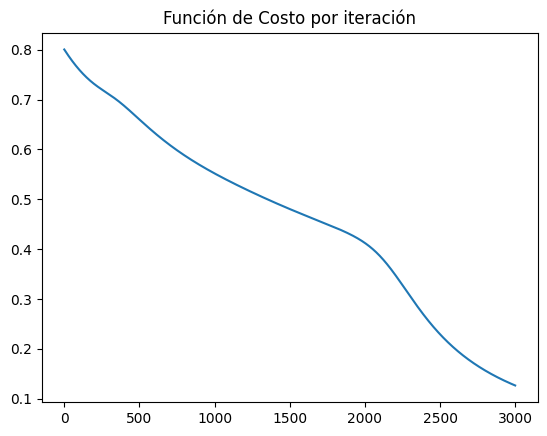

In [ ]:
sns.lineplot(x=range(len(loss)), y=loss)
plt.title("Función de Costo por iteración");

In [ ]:
model.predict(X)

1/1 [==============================] - 0s 186ms/step


array([[0.11533038],
       [0.90796465],
       [0.80467445],
       [0.06617887]], dtype=float32)

In [ ]:
1*(model.predict(X) > 0.5)

1/1 [==============================] - 0s 116ms/step


array([[0],
       [1],
       [1],
       [0]])

In [ ]:
y

array([[0],
       [1],
       [1],
       [0]])